<a href="https://colab.research.google.com/github/suneel7351/Burger-king/blob/master/btp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**pydicom:**is a widely used Python package for parsing and manipulating DICOM files, which are the standard for storing medical imaging data
 **nibabel**is a Python package primarily used for reading, writing, and manipulating neuroimaging data stored in the NIfTI and Analyze formats

In [ ]:
pip install pydicom nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pydicom

def update_bits_stored(dicom_data):
    # Update the Bits Stored value to 13 bits
    dicom_data.BitsStored = 13

def read_single_dicom_file(file_path):
    dicom_data = pydicom.dcmread(file_path)
    # Update the Bits Stored value
    update_bits_stored(dicom_data)
    return dicom_data.pixel_array

dicom_file_path = "/content/drive/MyDrive/btp/CT000006.dcm"
dicom_image = read_single_dicom_file(dicom_file_path)



In [ ]:
import pydicom

def update_bits_stored(dicom_file_path, new_bits_stored):
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Update the 'Bits Stored' tag (0028,0101)
    dicom_data.BitsStored = new_bits_stored

    # Save the modified DICOM file
    modified_file_path = dicom_file_path.replace('.dcm', '_modified.dcm')
    dicom_data.save_as(modified_file_path)
    return modified_file_path

# Path to the DICOM file
dicom_file_path = "/content/drive/MyDrive/btp/CT000006.dcm"

# New 'Bits Stored' value (e.g., 13 bits as indicated in the warning)
new_bits_stored = 13

# Update 'Bits Stored' and save the modified DICOM file
modified_file_path = update_bits_stored(dicom_file_path, new_bits_stored)
print("Modified DICOM file saved at:", modified_file_path)


Modified DICOM file saved at: /content/drive/MyDrive/btp/CT000006_modified.dcm


In [ ]:
import pydicom
from PIL import Image

def dicom_to_jpg(dicom_file_path):
    # Read the modified DICOM file
    dicom_data = pydicom.dcmread(dicom_file_path)
    # get pixal array
    pixel_array = dicom_data.pixel_array
    pixel_array = pixel_array.astype('uint8')
    # Create an image from the pixel array
    image = Image.fromarray(pixel_array)
    # Save the image as a JPEG file
    output_jpg_path = dicom_file_path.replace('.dcm', '.jpg')
    image.save(output_jpg_path)
    return output_jpg_path


modified_dicom_file_path = "/content/drive/MyDrive/btp/CT000006_modified.dcm"
output_jpg_path = dicom_to_jpg(modified_dicom_file_path)
print("Converted DICOM to JPG. Saved at:", output_jpg_path)


Converted DICOM to JPG. Saved at: /content/drive/MyDrive/btp/CT000006_modified.jpg


**convert whole folder  of .dcm files into .jpg file**

In [ ]:
import os
import pydicom
from PIL import Image

def dicom_to_jpg(dicom_file_path, output_folder):
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Get the pixel array
    pixel_array = dicom_data.pixel_array

    # Convert pixel data to 8-bit unsigned integer
    pixel_array = pixel_array.astype('uint8')

    # Create an image from the pixel array
    image = Image.fromarray(pixel_array)

    # Create an output file name with .jpg extension
    output_filename = os.path.splitext(os.path.basename(dicom_file_path))[0] + ".jpg"
    output_file_path = os.path.join(output_folder, output_filename)

    # Save the image as a JPEG file
    image.save(output_file_path)

def convert_dcm_folder_to_jpg(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through the DICOM files in the input folder
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".dcm"):
                dicom_file_path = os.path.join(root, file)
                dicom_to_jpg(dicom_file_path, output_folder)

# Path to the folder containing DICOM files
dicom_folder_path = "/content/drive/MyDrive/btp"

# Path to the folder where you want to save the JPEG images
output_folder_path = "/content/drive/MyDrive/jpg_folder_path"

# Convert the DICOM folder to JPEG images
convert_dcm_folder_to_jpg(dicom_folder_path, output_folder_path)
print("whole folder  coverted dcm to .jpg extension ")


whole folder  coverted dcm to .jpg extension 


In [ ]:
pip install scikit-image

**code to perfom skull stripping from jpg images**

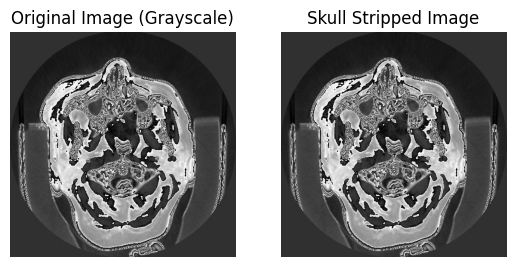

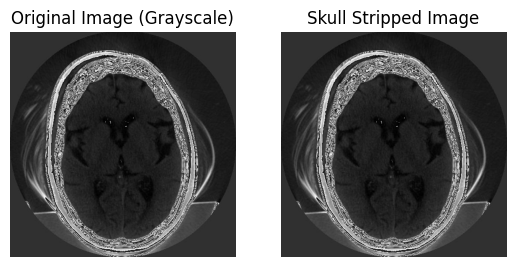

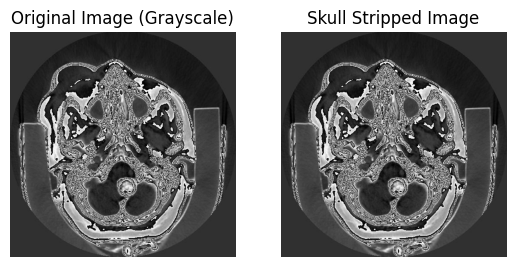

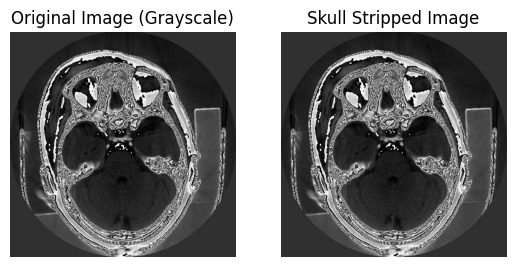

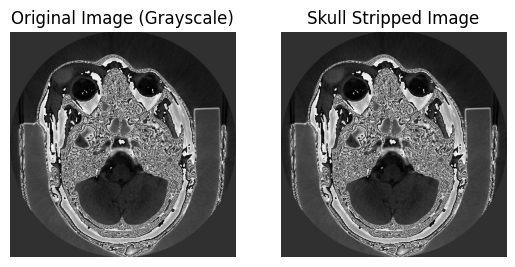

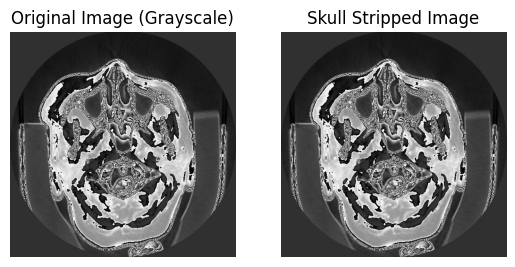

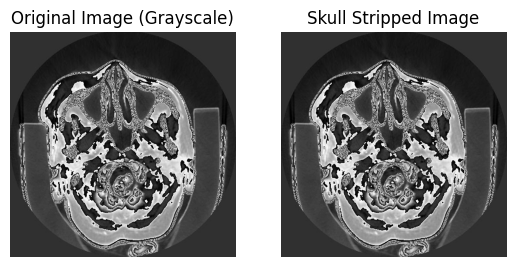

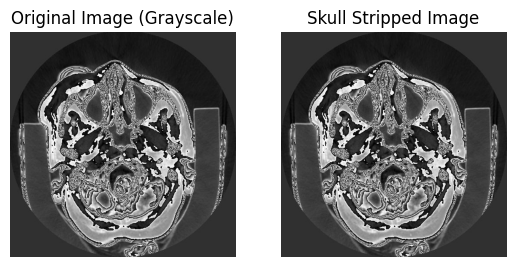

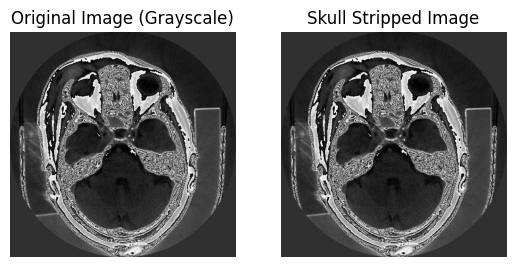

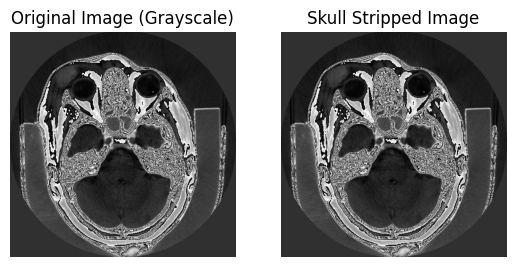

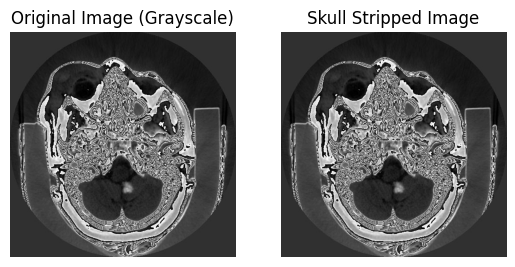

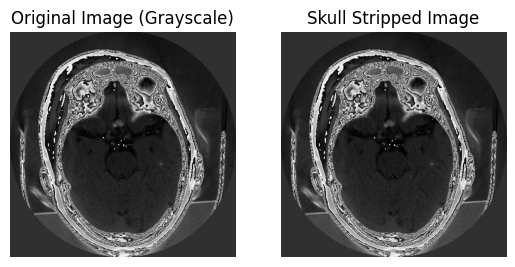

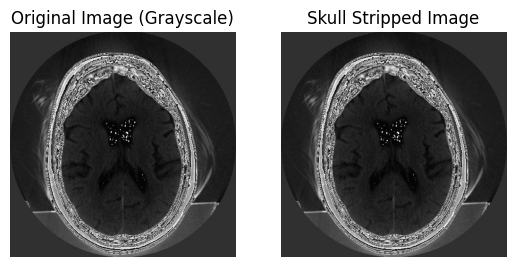

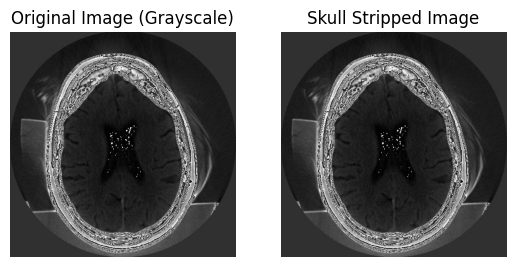

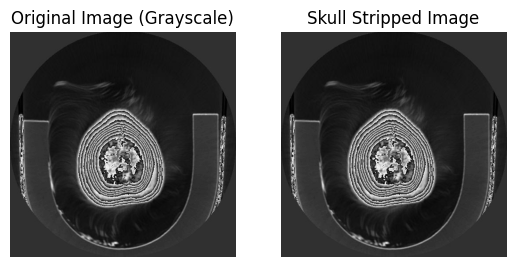

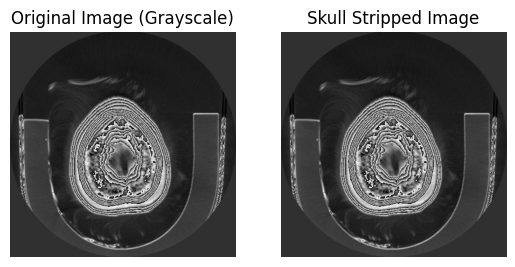

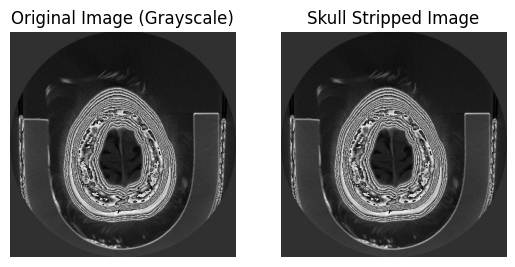

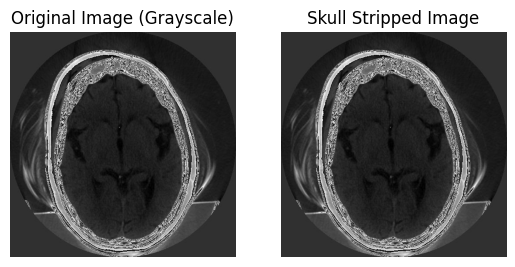

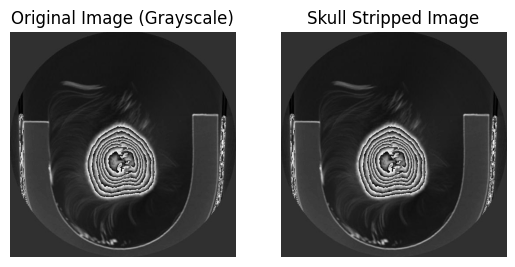

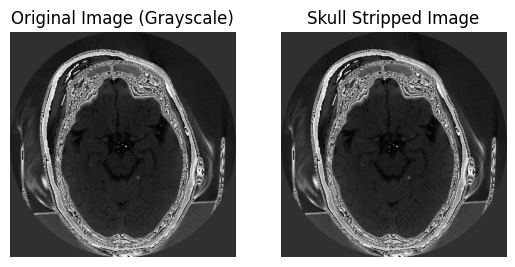

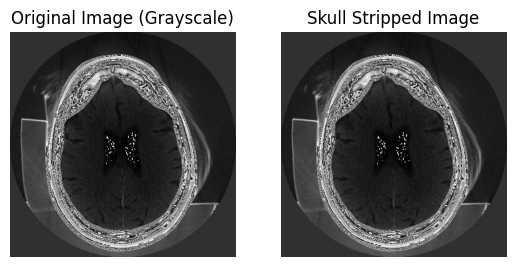

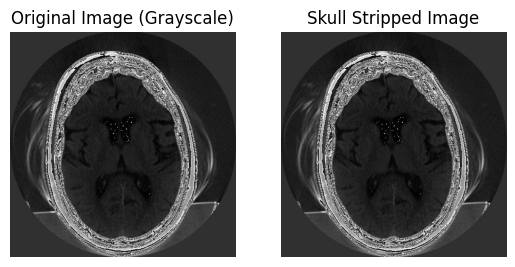

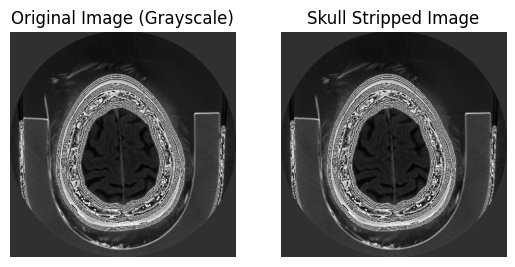

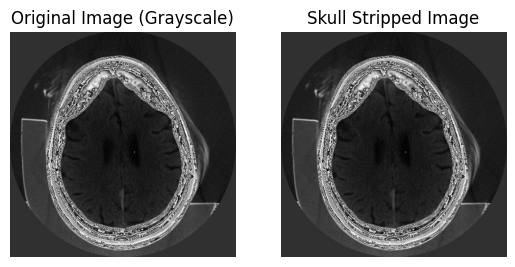

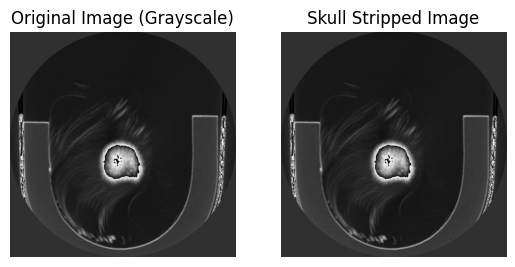

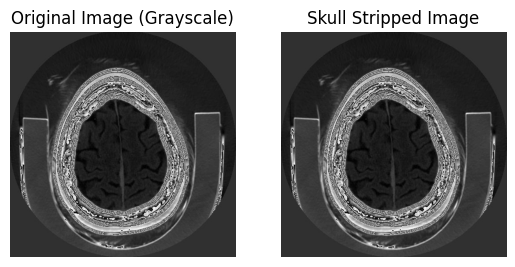

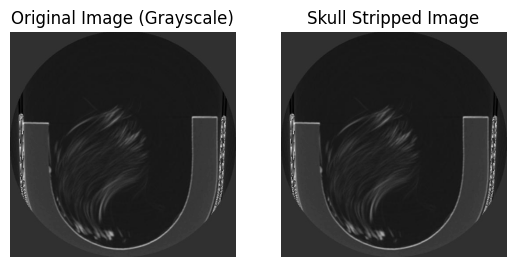

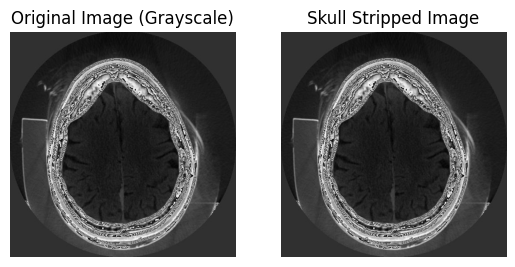

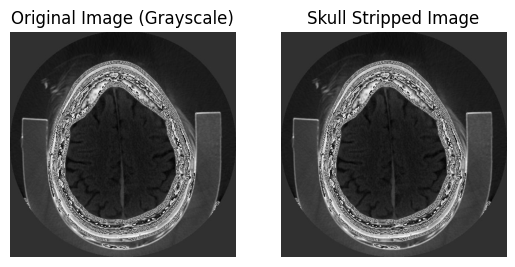

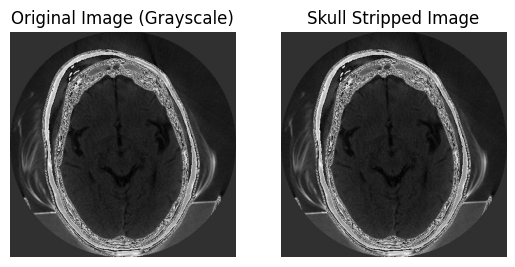

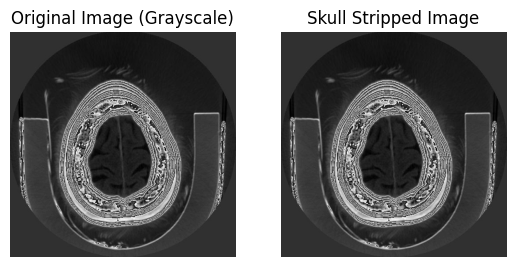

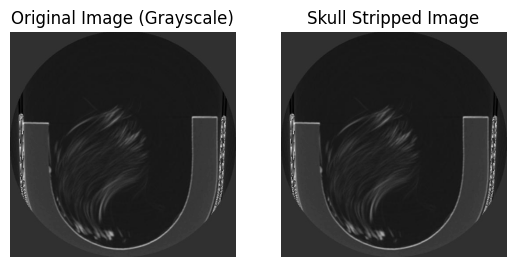

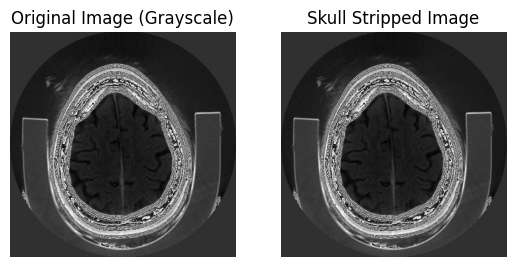

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

def skull_strip_gray(gray_img):
    # Apply a threshold to segment the brain (adjust threshold as needed)
    threshold_value = 0.5  # Adjust this threshold based on your images
    binary_img = gray_img > threshold_value

    # Perform morphological closing to fill holes and smooth edges
    closed_img = morphology.closing(binary_img, morphology.disk(5))

    # Mask the original grayscale image with the thresholded brain region
    skull_stripped_img = gray_img.copy()
    skull_stripped_img[~closed_img] = 0

    return skull_stripped_img

# Path to the folder containing JPEG images
jpg_folder_path = "/content/drive/MyDrive/jpg_folder_path"

# Path to the folder where you want to save the skull-stripped images
output_folder_path = "/content/drive/MyDrive/skull_strippeed_img"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate through the JPEG images in the input folder
for root, dirs, files in os.walk(jpg_folder_path):
    for file in files:
        if file.endswith(".jpg"):
            jpg_file_path = os.path.join(root, file)
            # Load the grayscale image
            gray_img = io.imread(jpg_file_path, as_gray=True)
            # Perform skull stripping
            skull_stripped_image = skull_strip_gray(gray_img)
            # Save the skull-stripped image
            output_filename = "skull_stripped_" + file
            output_file_path = os.path.join(output_folder_path, output_filename)
            io.imsave(output_file_path, skull_stripped_image)

            # Optionally display the original and skull-stripped images
            plt.figure()
            plt.subplot(1, 2, 1)
            plt.imshow(gray_img, cmap='gray')
            plt.title('Original Image (Grayscale)')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(skull_stripped_image, cmap='gray')
            plt.title('Skull Stripped Image')
            plt.axis('off')

            plt.show()


**visulizing the jpg image to skull stripped image**

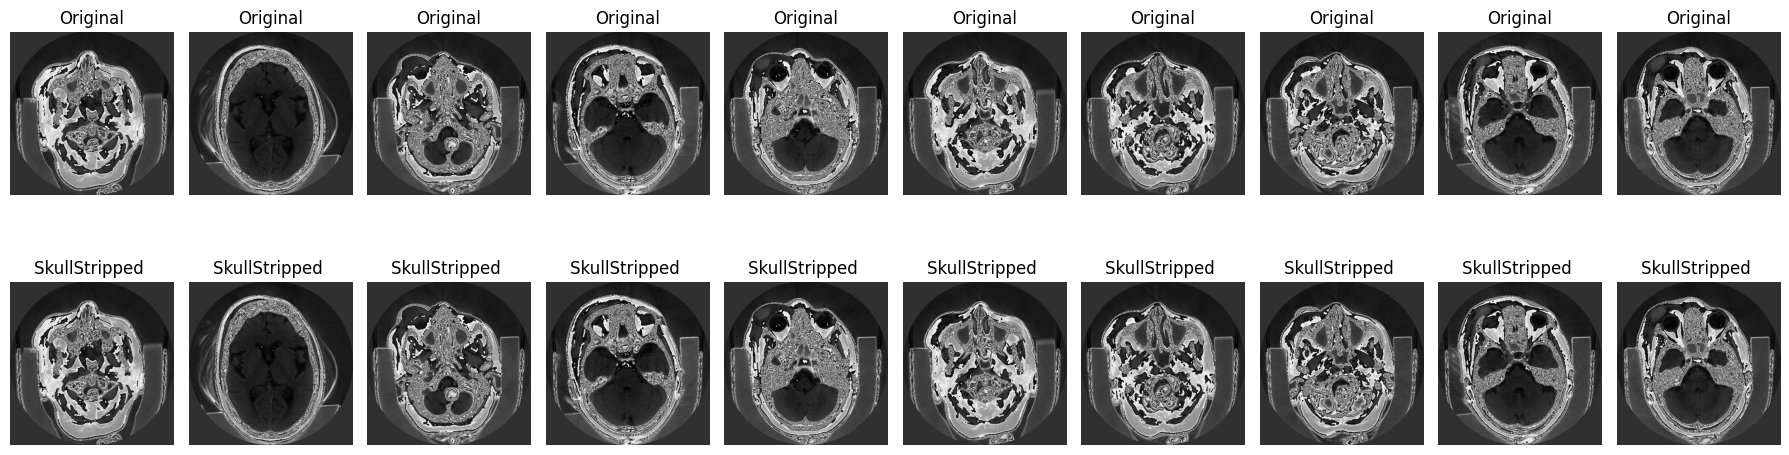

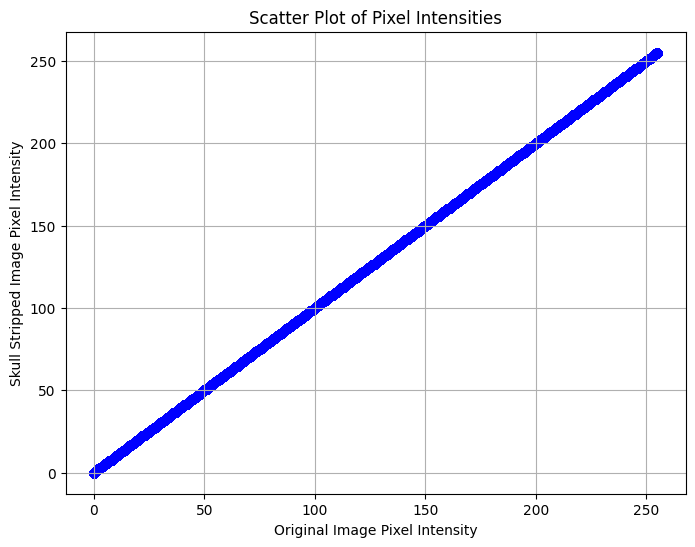

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

def skull_strip_gray(gray_img):
    # Apply a threshold to segment the brain (adjust threshold as needed)
    threshold_value = 0.3  # Adjust this threshold based on your images
    binary_img = gray_img > threshold_value

    # Perform morphological closing to fill holes and smooth edges
    closed_img = morphology.closing(binary_img, morphology.disk(5))

    # Mask the original grayscale image with the thresholded brain region
    skull_stripped_img = gray_img.copy()
    skull_stripped_img[~closed_img] = 0

    return skull_stripped_img

# Path to the folder containing JPEG images
jpg_folder_path = "/content/drive/MyDrive/jpg_folder_path"

# Path to the folder where you want to save the skull-stripped images
output_folder_path = "/content/drive/MyDrive/skull_strippeed_img"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Lists to store original and skull-stripped images for plotting
original_images = []
skull_stripped_images = []

# Counter to keep track of processed images
image_count = 0

# Iterate through the JPEG images in the input folder
for root, dirs, files in os.walk(jpg_folder_path):
    for file in files:
        if file.endswith(".jpg"):
            jpg_file_path = os.path.join(root, file)
            # Load the grayscale image
            gray_img = io.imread(jpg_file_path, as_gray=True)
            # Perform skull stripping
            skull_stripped_image = skull_strip_gray(gray_img)
            # Save the skull-stripped image
            output_filename = "skull_stripped_" + file
            output_file_path = os.path.join(output_folder_path, output_filename)
            io.imsave(output_file_path, skull_stripped_image)

            # Append the images for plotting
            original_images.append(gray_img)
            skull_stripped_images.append(skull_stripped_image)

            # Increment the image count
            image_count += 1

            # Break the loop after processing 10 images
            if image_count == 10:
                break

# Display the original and skull-stripped images using matplotlib
num_images = len(original_images)
plt.figure(figsize=(18, 6))  # Adjust the figure size

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(skull_stripped_images[i], cmap='gray')
    plt.title('SkullStripped ')
    plt.axis('off')

plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

# Flatten the 2D images into 1D arrays
original_pixels = original_images[0].ravel()  # Using the first image for demonstration
skull_stripped_pixels = skull_stripped_images[0].ravel()  # Using the first image for demonstration

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(original_pixels, skull_stripped_pixels, color='blue', alpha=0.5)  # 'alpha' controls the transparency of the markers
plt.title('Scatter Plot of Pixel Intensities')
plt.xlabel('Original Image Pixel Intensity')
plt.ylabel('Skull Stripped Image Pixel Intensity')
plt.grid(True)  # Add a grid
plt.show()


**remove skull from jpg image**

In [ ]:
import cv2

def remove_skull(gray_img):
    # Convert the grayscale image to binary using adaptive thresholding
    _, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform morphological closing to fill holes and smooth edges
    kernel = np.ones((5, 5), np.uint8)
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    # Mask the original grayscale image with the thresholded brain region
    skull_stripped_img = gray_img.copy()
    skull_stripped_img[~closed_img.astype(bool)] = 0

    return skull_stripped_img

# Path to the folder containing JPEG images
jpg_folder_path = "/content/sample_data/outputfolderdcm"

# Path to the folder where you want to save the skull-stripped images
output_folder_path = "/content/sample_data/skullstrippedimageoutput"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate through the JPEG images in the input folder
for root, dirs, files in os.walk(jpg_folder_path):
    for file in files:
        if file.endswith(".jpg"):
            jpg_file_path = os.path.join(root, file)
            # Load the grayscale image
            gray_img = io.imread(jpg_file_path, as_gray=True)
            # Perform skull removal
            skull_removed_image = remove_skull(gray_img)
            # Save the skull-removed image
            output_filename = "skull_removed_" + file
            output_file_path = os.path.join(output_folder_path, output_filename)
            io.imsave(output_file_path, skull_removed_image)

image_count = 0
# Iterate through the JPEG images in the input folder
for root, dirs, files in os.walk(jpg_folder_path):
    for file in files:
        if file.endswith(".jpg"):
            jpg_file_path = os.path.join(root, file)
            # Load the grayscale image
            gray_img = io.imread(jpg_file_path, as_gray=True)
            # Perform skull removal
            skull_removed_image = remove_skull(gray_img)
            # Save the skull-removed image
            output_filename = "skull_removed_" + file
            output_file_path = os.path.join(output_folder_path, output_filename)
            io.imsave(output_file_path, skull_removed_image)

            # Optionally display the original and skull-removed images
            plt.figure()
            plt.subplot(1, 2, 1)
            plt.imshow(gray_img, cmap='gray')
            plt.title('Original Image (Grayscale)')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(skull_removed_image, cmap='gray')
            plt.title('Skull Removed Image')
            plt.axis('off')

            plt.show()

            # Increment the image count
            image_count += 1

            # Break the loop after processing 10 images
            if image_count == 10:
                break


nfbs

https://www.catalyzex.com/paper/arxiv:2211.16570